In [1]:
import pandas as pd
import numpy as np
import os as os
os.getcwd()

'C:\\Users\\Peeyush\\Downloads\\boomerang'

In [2]:
df = pd.read_csv('data.csv')
df.head()

,t,price,sales
0,1,15,237
1,2,15,263
2,3,15,265
3,4,15,265
4,5,15,327


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## Lets do the sns lmplot to see if there is a relationship between price and sales. As we observe when we decrease the value of price , sales increases. However profit margin might be going less. hence we need to form more features to find a pattern in the data

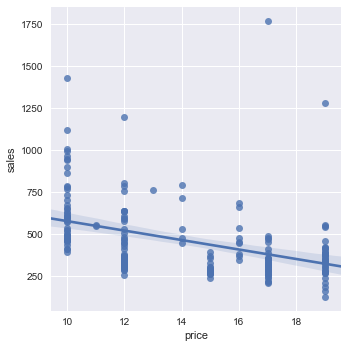

In [4]:
sns.lmplot(x='price',y='sales',data=df)

## when we look at the data, we observe that sales are increased during friday and weekends, compared to weekdays. Lets form out feature out of it.

In [5]:

df.head(15)

,t,price,sales
0,1,15,237
1,2,15,263
2,3,15,265
3,4,15,265
4,5,15,327
5,6,15,392
6,7,15,300
7,8,15,261
8,9,15,288
9,10,15,300


In [6]:
# df['Saturday'] = df['sales'][5::7]
# df['Sunday'] = df['sales'][6::7]
df['isWeekend'] = 0
df['isFriday'] = 0
df['isWeekend'][5::7] = 1
df['isWeekend'][6::7] = 1
df['isFriday'][4::7] = 1

    

## Here we assign a value of zero and 1 for isWeekend and isFriday features.

In [7]:
# if(df.iloc[1]['Saturday'] == df.isnull):
#     print('yes')
df.head(15)

,t,price,sales,isWeekend,isFriday
0,1,15,237,0,0
1,2,15,263,0,0
2,3,15,265,0,0
3,4,15,265,0,0
4,5,15,327,0,1
5,6,15,392,1,0
6,7,15,300,1,0
7,8,15,261,0,0
8,9,15,288,0,0
9,10,15,300,0,0


## lets import sklearn apis for regression. target label would be sales and feature vectors would be everything except sales. we can do preprocessing also. However it is not required as data is in similar range. we also divide our data to training and test data.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, svm, preprocessing

C:\Users\Peeyush\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
X= np.array(df.drop('sales',1))
y=np.array(df['sales'])

In [10]:
X=preprocessing.scale(X)

C:\Users\Peeyush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [11]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [12]:
clf= LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.24581432835082692

## looking at the coficients it is evident that weekend and friday price are important to the dataset.

In [13]:
clf.coef_

array([ 129.77045729, -139.14224065,   56.70953771,   49.04796678])

 ## I also tried SVR, but it does not perform well compared to Linear regression

In [14]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.148870608474
poly -0.0096257952534
rbf -0.0352904868183
sigmoid -0.000703071363078


## since there will be huge data in pairplot. I am keeping a sales threshold and creating two extra features from visualization point of view. As we can see I normalized sales for weekdays as in paiplot of I wanted to categorize two different sales model for weekdays and weekends. sum of weekday sales would be large and thus normalizing it in the below code. This is for visualization pupose. In the pairplot we can see there are signigficant no of sales for threshold_sales_weekend.

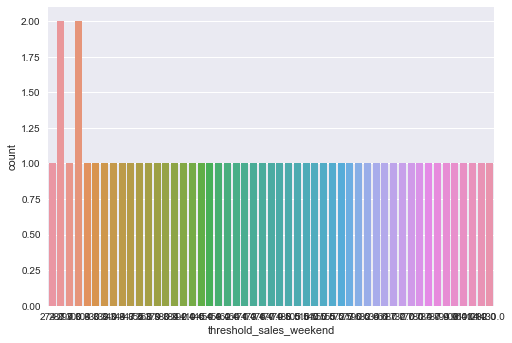

In [15]:

df['threshold_sales_weekend'] = df[(df['sales'] > 270) & (df['isWeekend']==1)]['sales']
df['threshold_sales_weekday']=  df[(df['isWeekend']==0) & (df['sales'] > 270)]['sales']*0.2
sns.countplot(x='threshold_sales_weekend', data=df)


In [16]:
df.head(30)

,t,price,sales,isWeekend,isFriday,threshold_sales_weekend,threshold_sales_weekday
0,1,15,237,0,0,NaN,NaN
1,2,15,263,0,0,NaN,NaN
2,3,15,265,0,0,NaN,NaN
3,4,15,265,0,0,NaN,NaN
4,5,15,327,0,1,NaN,65.4
5,6,15,392,1,0,392.0,NaN
6,7,15,300,1,0,300.0,NaN
7,8,15,261,0,0,NaN,NaN
8,9,15,288,0,0,NaN,57.6
9,10,15,300,0,0,NaN,60.0


## removing nan values are feeding it again to regressor with extra features. we see that accuracy is improved now.

In [17]:

df.threshold_sales_weekday = df['threshold_sales_weekday'].fillna((df['threshold_sales_weekday'].mean()))
df.threshold_sales_weekend = df['threshold_sales_weekend'].fillna((df['threshold_sales_weekend'].mean()))
X= np.array(df.drop('sales',1))
y=np.array(df['sales'])
df

,t,price,sales,isWeekend,isFriday,threshold_sales_weekend,threshold_sales_weekday
0,1,15,237,0,0,543.471698,91.855556
1,2,15,263,0,0,543.471698,91.855556
2,3,15,265,0,0,543.471698,91.855556
3,4,15,265,0,0,543.471698,91.855556
4,5,15,327,0,1,543.471698,65.400000
5,6,15,392,1,0,392.000000,91.855556
6,7,15,300,1,0,300.000000,91.855556
7,8,15,261,0,0,543.471698,91.855556
8,9,15,288,0,0,543.471698,57.600000
9,10,15,300,0,0,543.471698,60.000000


In [18]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [19]:
clf= LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.85030991464965433

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
clf= DecisionTreeRegressor()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.81871866302265173

## Somehow my graphviz crashed so commented out the code

In [24]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn import tree
# import pydotplus
# # dot_data = StringIO()
# # export_graphviz(clf, out_file=dot_data,  
# #                 filled=True, rounded=True,
# #                 special_characters=True)
# # graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# # Image(graph.create_png())

# tree.export_graphviz(clf, out_file='tree.dot') #produces dot file

# # import pydot
# dotfile = StringIO()
# tree.export_graphviz(clf, out_file=dotfile)
# pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("dtree2.png")

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
clf = RandomForestRegressor(max_depth=2, random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.46304018505152411

In [27]:
print(clf.feature_importances_)

[ 0.          0.04307541  0.          0.          0.41809622  0.53882836]


In [28]:
df.head()

,t,price,sales,isWeekend,isFriday,threshold_sales_weekend,threshold_sales_weekday
0,1,15,237,0,0,543.471698,91.855556
1,2,15,263,0,0,543.471698,91.855556
2,3,15,265,0,0,543.471698,91.855556
3,4,15,265,0,0,543.471698,91.855556
4,5,15,327,0,1,543.471698,65.400000


In [29]:
df['price_sales_combined'] = df['price'] * df['sales']

In [30]:
df.head()

,t,price,sales,isWeekend,isFriday,threshold_sales_weekend,threshold_sales_weekday,price_sales_combined
0,1,15,237,0,0,543.471698,91.855556,3555
1,2,15,263,0,0,543.471698,91.855556,3945
2,3,15,265,0,0,543.471698,91.855556,3975
3,4,15,265,0,0,543.471698,91.855556,3975
4,5,15,327,0,1,543.471698,65.400000,4905


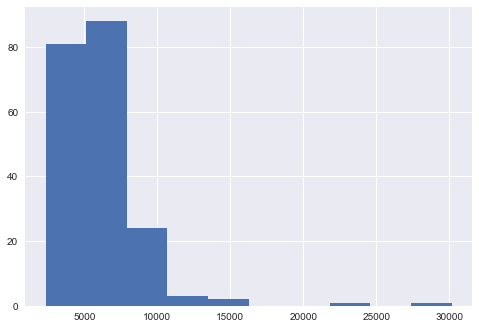

In [31]:
df['price_sales_combined'].hist()

In [32]:
df['price_sales_combined'].mean()

6188.89

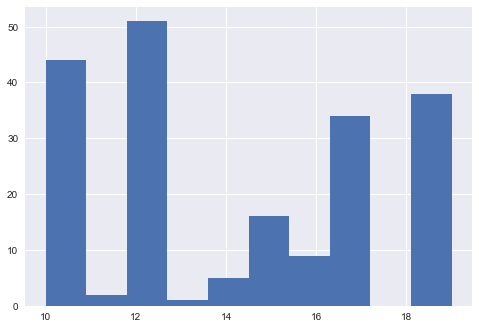

In [33]:
df['price'].hist()

In [34]:
df['price'].mean()

14.205

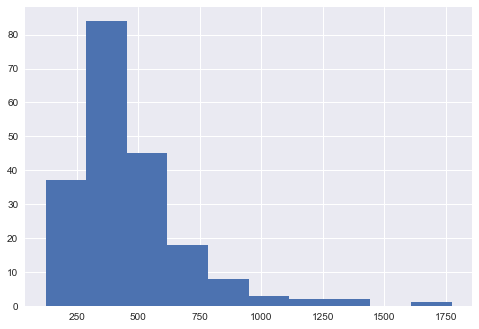

In [35]:
df['sales'].hist()

In [36]:
df['sales'].mean()

457.81